# Selective Color

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, io, color

First I'll create a function to compute the euclidean distance (code from class).

In [18]:
def euclideanDistance(a, b):
    a = np.array(a)
    b = np.array(b)
    return np.sqrt(np.sum((a - b) ** 2))

Then I get a copy of the image and save its width and height so I can iterate over the pixels. Then I convert the color to a numpy array so I can use it in the distance function.

To turn everything gray, I used `rgb2gray` which returns floats in [0,1], so I scaled them back to [0,255].

Then we iterate over the pixels and compute the distance to the color. If it's less than a threshold, we set it to the gray value.

In [19]:
def selectiveColor(img, col=[0,0,0], margin=0):
    img_out = img.copy()
    h, w, _ = img.shape
    col = np.array(col)

    gray_img = (color.rgb2gray(img) * 255).astype(np.uint8)

    for i in range(h):
        for j in range(w):
            pixel = img[i, j]
            dist = euclideanDistance(pixel, col)
            if dist > margin:
                g = gray_img[i, j]
                img_out[i, j] = [g, g, g]

    return img_out

Lets now test on the astronaut image.

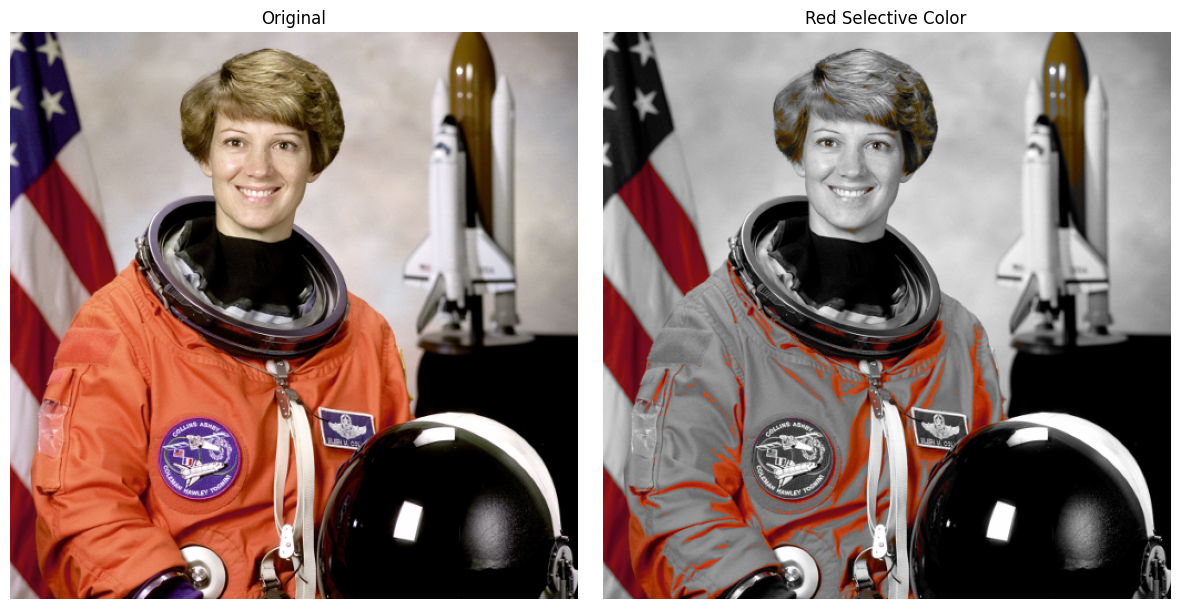

In [29]:
img = data.astronaut()
result = selectiveColor(img, col=[150, 0, 0], margin=100)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.imshow(img); 
ax1.set_title("Original"); 
ax1.axis("off")

ax2.imshow(result);
ax2.set_title("Red Selective Color"); 
ax2.axis("off")

plt.tight_layout()
plt.show()

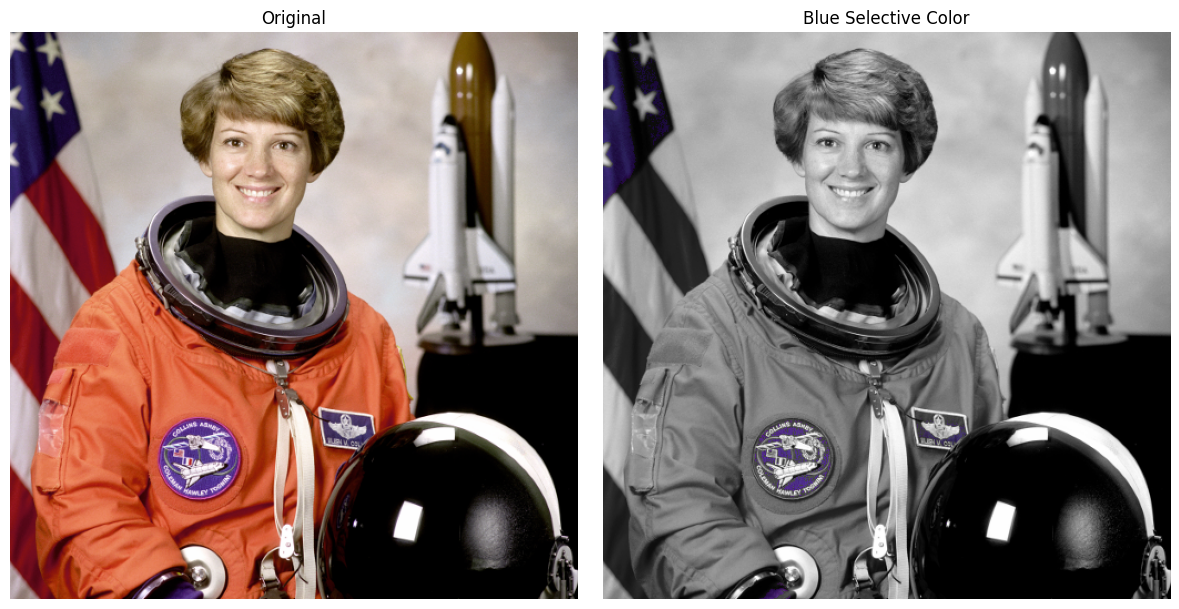

In [31]:
result = selectiveColor(img, col=[0, 0, 150], margin=100)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.imshow(img); 
ax1.set_title("Original"); 
ax1.axis("off")

ax2.imshow(result);
ax2.set_title("Blue Selective Color"); 
ax2.axis("off")

plt.tight_layout()
plt.show()

# Cropping

In [ ]:
def crop(img):
    gray_img = color.rgb2gray(img)

    mask = gray_img > 0.05

    rows = np.any(mask, axis=1)
    cols = np.any(mask, axis=0)

    top = np.argmax(rows)
    bottom = len(rows) - 1 - np.argmax(rows[::-1])
    left = np.argmax(cols)
    right = len(cols) -1 - np.argmax(cols[::-1])

    cropped_img = img[top:bottom + 1, left:right + 1]

    return cropped_img

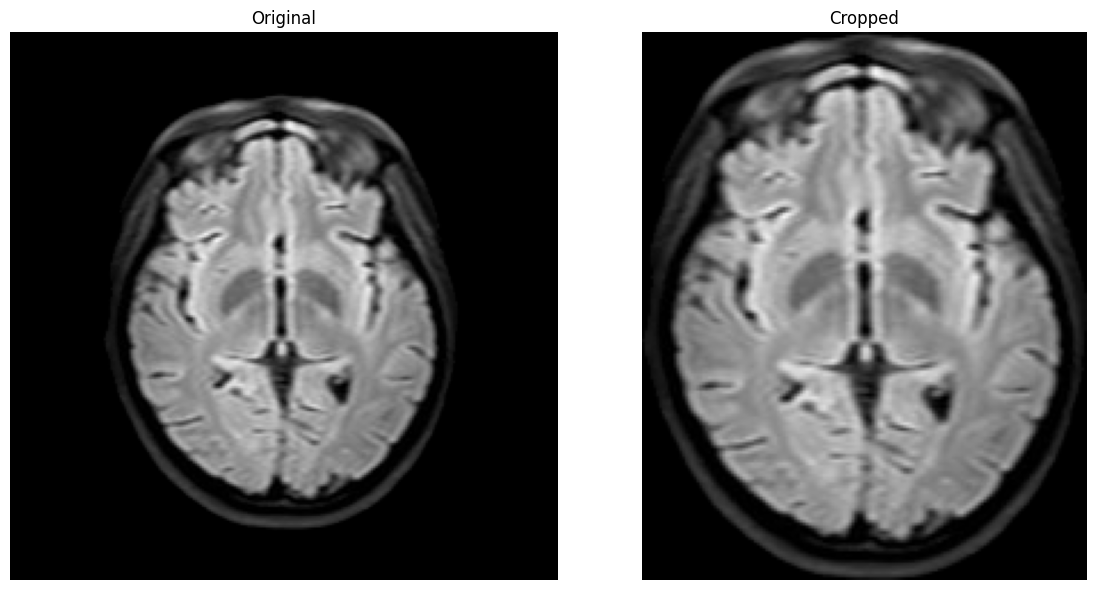

In [36]:
brain_img = io.imread('019_AC_T2.jpg')
result = crop(brain_img)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.imshow(brain_img);
ax1.set_title("Original");
ax1.axis("off")

ax2.imshow(result);
ax2.set_title("Cropped");
ax2.axis("off")

plt.tight_layout()
plt.show()